In [1]:
import math

import matplotlib.axes
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns
import numpy as np

In [6]:
def plot(name : str, filename : str, iter : int):

    df = pd.read_csv(filename)

    fig, ax = plt.subplots(1, 5, figsize=(40, 10))
    plt.rcParams['font.size'] = '20'
    fig.suptitle(name)

    impedance = np.array(df['Impedance'])
    phase = np.array(df['Phase'])

    real = impedance * np.cos(np.radians(phase))
    imaginary = impedance * np.sin(np.radians(phase))

    frequency = np.array(df['Frequency'])

    series_resistance = np.abs(impedance) * np.cos(np.radians(phase))
    series_capacitance = -1 / (frequency * 2 * math.pi * np.abs(impedance) * np.sin(np.radians(phase)))

    parallel_resistance = np.abs(impedance) / np.cos(np.radians(phase))
    parallel_capacitance = np.divide(-np.sin(np.radians(phase)), (np.abs(impedance) * 2 * math.pi * frequency))

    sns.lineplot(ax=ax[0], x=real, y=imaginary)
    ax[0].set_xlabel('Real (Ω)')
    ax[0].set_ylabel('Imaginary (Ω)')
    ax[0].title.set_text('Real vs. Imaginary')

    sns.lineplot(ax=ax[1], x=frequency, y=phase)
    ax[1].title.set_text('Frequency vs. Phase')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Phase (°)')

    sns.lineplot(ax=ax[2], x=frequency, y=impedance)
    ax[2].title.set_text('Frequency vs. Impedance')
    ax[2].set_xlabel('Frequency (Hz)')
    ax[2].set_ylabel('Impedance (Ω)')

    sns.lineplot(ax=ax[3], x=frequency, y=parallel_capacitance)
    ax[3].title.set_text('Frequency vs. Parallel Capacitance')
    ax[3].set_xlabel('Frequency (Hz)')
    ax[3].set_ylabel('Capacitance (F)')

    sns.lineplot(ax=ax[4], x=frequency, y=parallel_resistance)
    ax[4].title.set_text('Frequency vs. Parallel Resistance')
    ax[4].set_xlabel('Frequency (Hz)')
    ax[4].set_ylabel('Resistance (Ω)')

    plt.savefig(f'plots/{name}_{iter}.jpeg', dpi=1000)
    plt.savefig(f'eps/{name}.eps', dpi=1000)

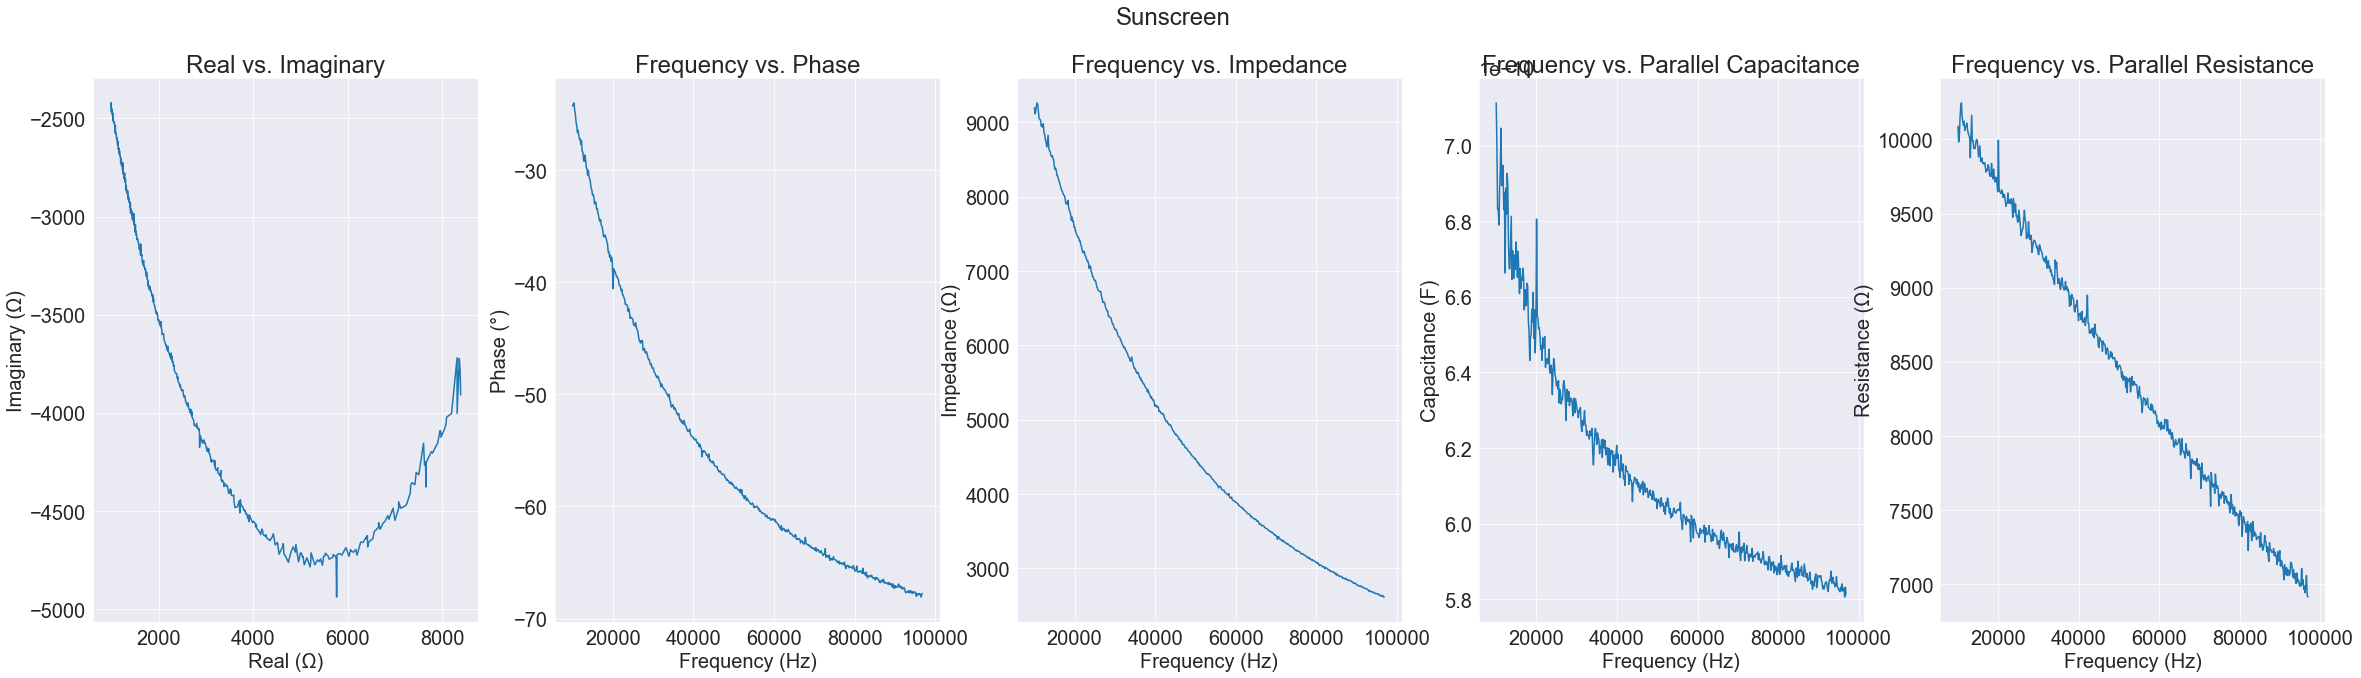

In [8]:
plot("Sunscreen", "data/20230108_SSN_t1_st_mpr.csv", 3)